<a href="https://colab.research.google.com/github/jdasam/mas1004-2022/blob/main/notebooks/Data_AI_6th_week_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

DEV = 'cuda'

In [2]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# See how our data looks like
# you can get the i-th data from the dataset class using dataset[i]
train_data[0] # this will return (image tensor, label)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
img, label = train_data[0] # A datasample is a pair of image and label

In [8]:
img.shape

torch.Size([1, 28, 28])

In [10]:
# you can delete axis that has only one item by squeeze
img = img.squeeze() # or img = img[0] or img = img[0, :, : ]
img.shape

torch.Size([28, 28])

Label is 5


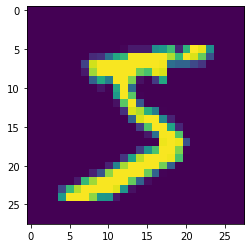

In [13]:
plt.imshow(img), 
print(f'Label is {label}') # f means formatted string

Label is 5


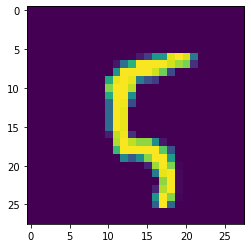

In [16]:
data_idx = 100
img, label = train_data[data_idx]
plt.imshow(img.squeeze())
print(f'Label is {label}')



In [17]:
# how many data exists in our train_data?
len(train_data)

60000

In [19]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
# We have to convert a tensor of 28, 28 to a tensor of 784

# we can reshape a tensor to have a specific shape
img.reshape(784)
img.reshape(-1) # automatically decide the size of that dimension 

In [27]:
img.numel()

784

In [ ]:
# reshape is a function that converts a shape of tensor into specific shape
img.reshape(1,2,14,28)

In [30]:
test = torch.arange(12)
test

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [33]:
test.reshape(2, 6), test.reshape(3,4), test.reshape(2,2,3)

(tensor([[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11]]), tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]), tensor([[[ 0,  1,  2],
          [ 3,  4,  5]],
 
         [[ 6,  7,  8],
          [ 9, 10, 11]]]))

In [36]:
test.reshape(3, -1) # automatically decides the size of last dimension


tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [38]:
# we can flatten the img by reshape(-1)
flattened_img = img.reshape(-1)
flattened_img.shape, flattened_img

(torch.Size([784]),
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        

In [46]:
# let's collect 1000 data from train_data

count = 0
img_list = []
label_list = []

for data in train_data:
  img, label = data
  # print(label, img.shape)
  img_list.append(img)
  label_list.append(label)
  count += 1
  if count >= 1000:
    break

In [48]:
len(img_list), len(label_list)

(1000, 1000)

In [49]:
# img list is a list of tensor
type(img_list), type(img_list[0])

# we want to convert a list of tensor to a single tensor

(list, torch.Tensor)

In [55]:
# two ways to convert a list of tensor to a single tensor
# torch.cat() concatenates a list of tensor to an existing dim
# torch.stack() concatenates a list of tensor to a new dim

out = torch.cat(img_list, dim=0)
out.shape

torch.Size([1000, 28, 28])

In [57]:
(out[100] == img_list[100]).all()

tensor(True)

In [59]:
# flatten that out tensor so that each datasample has 784 numbers
flattened_data = out.reshape(1000, 784) # out.reshape(1000, -1)
flattened_data.shape


torch.Size([1000, 784])